In [117]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import cmcrameri.cm as cmcm
from scipy.io import readsav
from matplotlib import ticker
import matplotlib.colors as colors
import juanfit
from juanfit import SpectrumFitSingle
from glob import glob
import sunpy
import sunpy.map
eit_195_cm = plt.get_cmap("sohoeit195")
eit_171_cm = plt.get_cmap("sohoeit171")
eit_284_cm = plt.get_cmap("sohoeit284")
eit_304_cm = plt.get_cmap("sohoeit304")
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.patches import Rectangle


In [100]:
filenames_0331 = glob("../src/eit/level1/eit*0331*")
filenames_0331 = sorted(filenames_0331)

In [101]:
filenames_0401 = glob("../src/eit/level1/eit*0401*")
filenames_0401 = sorted(filenames_0401)

In [18]:
color_maps = {171:eit_171_cm,195:eit_195_cm,284:eit_284_cm,304:eit_304_cm}

In [118]:
def eit_plot(filename,min_percent=5,max_percent=99.9,plot_axis=True):
    with fits.open(filename) as hdul:
        img = hdul[0].data
        hdr = hdul[0].header

        xcen = hdr["CRPIX1"]
        ycen = hdr["CRPIX2"]
        nx = hdr["NAXIS1"]
        ny = hdr["NAXIS2"]
        delta_x = hdr["CDELT1"]
        delta_y = hdr["CDELT2"]
        wvl = hdr["WAVELNTH"]
        date_obs = hdr["DATE-OBS"]
        
        xcoord = np.linspace(-xcen*delta_x,(nx-xcen)*delta_x,nx)
        ycoord = np.linspace(-ycen*delta_y,(ny-ycen)*delta_y,ny)
        #print(hdr)

        img_mask = np.copy(img)
        img_mask[img_mask < 0] = np.nan
        vmin = np.nanpercentile(img_mask,min_percent)
        vmax = np.nanpercentile(img_mask,max_percent)
        fig,ax = plt.subplots(figsize=(8,8),constrained_layout=True)
        norm=colors.LogNorm(vmin=vmin, vmax=vmax)
        ax.pcolormesh(xcoord,ycoord,img_mask,cmap=color_maps[wvl],
        norm=colors.LogNorm(vmin=vmin, vmax=vmax),rasterized=True,
        shading="auto")

        EIS_rectangle = Rectangle((495.7-236, -157 - 235.5), 238, 490, ls="--", lw=2, ec="red", fc="none")
        ax.add_patch(EIS_rectangle)

        ax.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
        ax.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
        ax.text(0.98,0.97,r"\textbf{"+date_obs[:-7]+r"}",ha = 'right',va = 'center',
         color = 'white',fontsize = 18,linespacing=1.5,transform=ax.transAxes)
        ax.text(0.02,0.97,r"\textbf{EIT "+str(wvl)+r" \mbox{\AA}}",ha = 'left',va = 'center',
         color = 'white',fontsize = 18,linespacing=1.5,transform=ax.transAxes)
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax.tick_params(labelsize=18)
        ax.tick_params(which="major",width=1.2,length=6)
        ax.tick_params(which="minor",width=1.2,length=4)
        ax.axis("scaled")
        ax.set_xlim(-1000,1000)
        ax.set_ylim(-1000,1000)

        if not plot_axis:
            plt.axis("off")
        

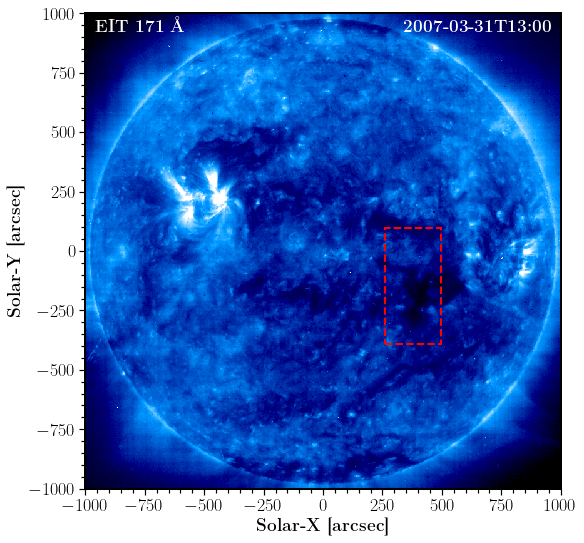

In [119]:
eit_plot(filename=filenames_0331[0])
plt.savefig(fname="../figs/eit_summary/eit_171.png",format="png",dpi=300,transparent=False)

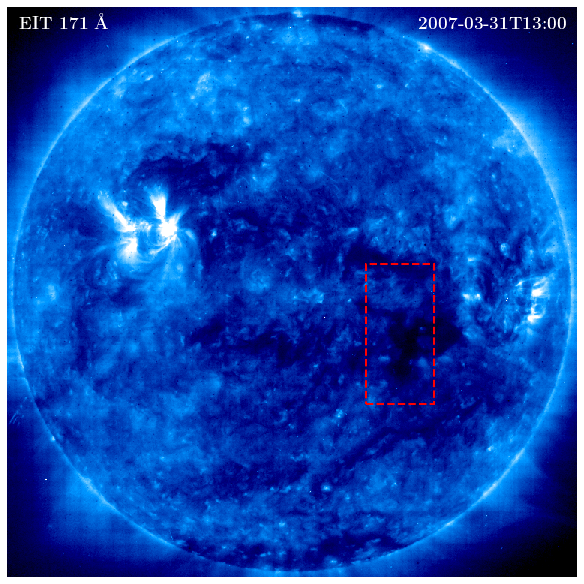

In [120]:
eit_plot(filename=filenames_0331[0],plot_axis=False)
plt.savefig(fname="../figs/eit_summary/eit_171_noaxis.png",format="png",dpi=300,transparent=False)

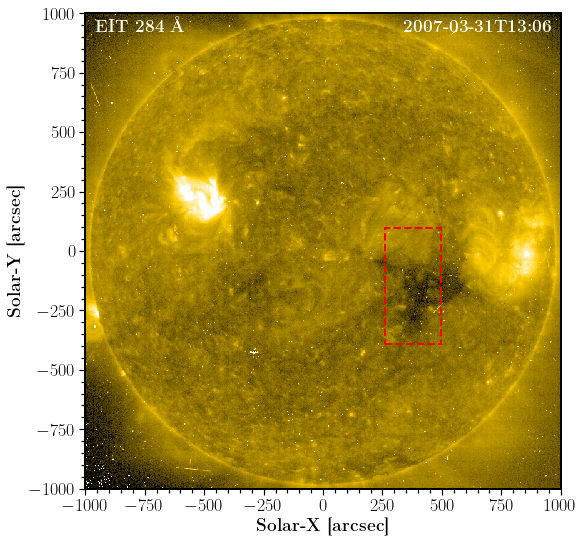

In [121]:
eit_plot(filename=filenames_0331[1])
plt.savefig(fname="../figs/eit_summary/eit_284.png",format="png",dpi=300,transparent=False)

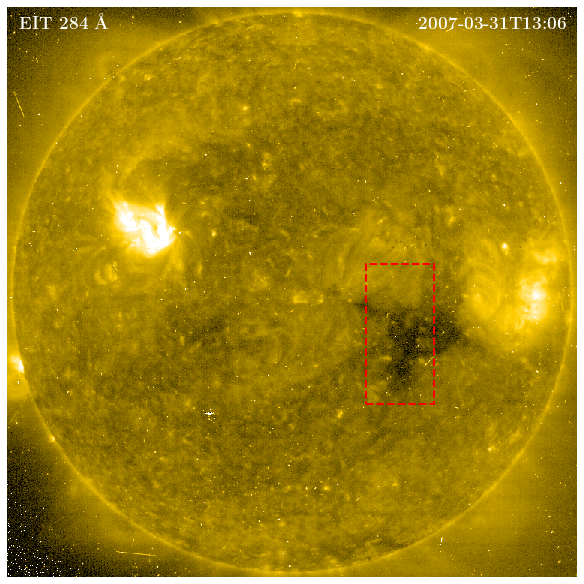

In [122]:
eit_plot(filename=filenames_0331[1],plot_axis=False)
plt.savefig(fname="../figs/eit_summary/eit_284_noaxis.png",format="png",dpi=300,transparent=False)

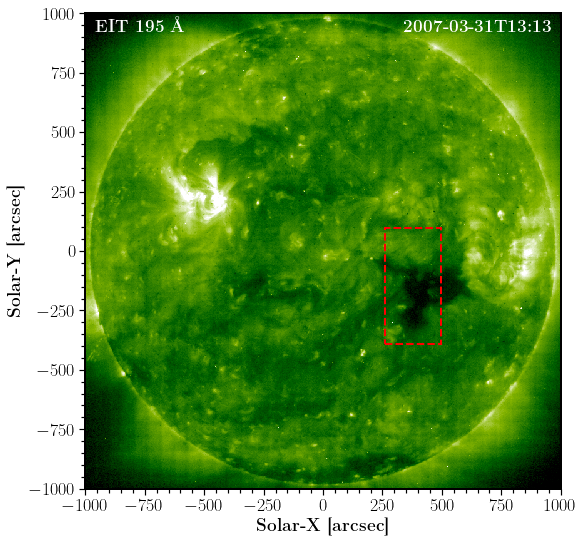

In [135]:
eit_plot(filename=filenames_0331[2])
plt.savefig(fname="../figs/eit_summary/eit_195.png",format="png",dpi=300,transparent=False)
plt.savefig(fname="../figs/eit_summary/eit_195.pdf",format="pdf",dpi=300,transparent=False)

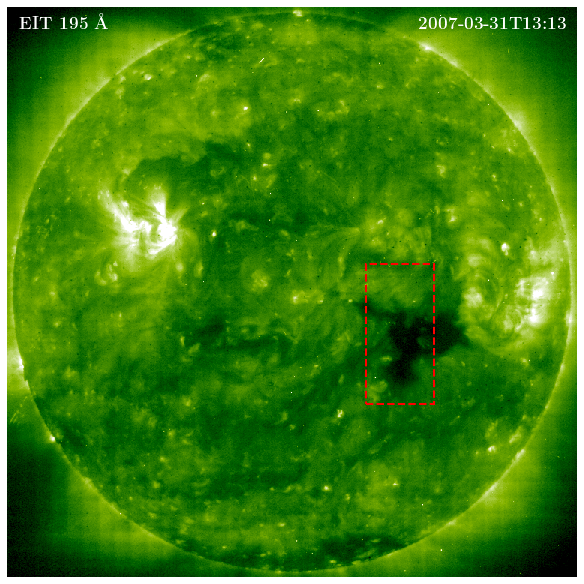

In [124]:
eit_plot(filename=filenames_0331[2],plot_axis=False)
plt.savefig(fname="../figs/eit_summary/eit_195_noaxis.png",format="png",dpi=300,transparent=False)

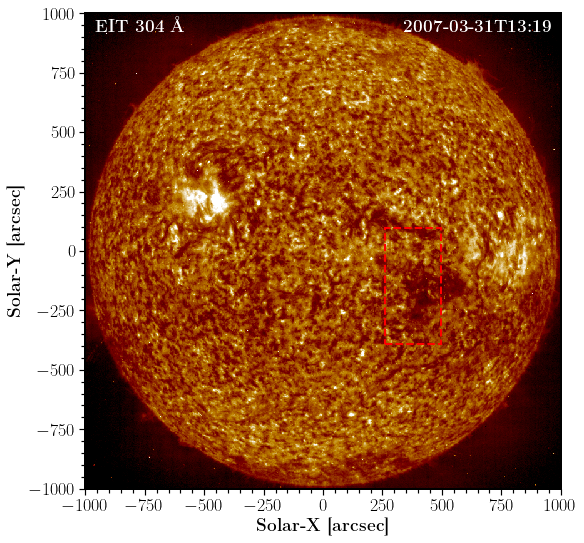

In [125]:
eit_plot(filename=filenames_0331[3])
plt.savefig(fname="../figs/eit_summary/eit_304.png",format="png",dpi=300,transparent=False)

In [150]:
def eit_plot_zoomin(filenames,min_percent=5,max_percent=99.9,xlim=(230,620),ylim=(-450,150),plot_EIS=False):
    fig, axes = plt.subplots(2,2,figsize=(10,12),constrained_layout=True)
    for ii, ax in enumerate(axes.flatten()):
        with fits.open(filenames[ii]) as hdul:
            img = hdul[0].data
            hdr = hdul[0].header

            xcen = hdr["CRPIX1"]
            ycen = hdr["CRPIX2"]
            nx = hdr["NAXIS1"]
            ny = hdr["NAXIS2"]
            delta_x = hdr["CDELT1"]
            delta_y = hdr["CDELT2"]
            wvl = hdr["WAVELNTH"]
            date_obs = hdr["DATE-OBS"]
            
            xcoord = np.linspace(-xcen*delta_x,(nx-xcen)*delta_x,nx)
            ycoord = np.linspace(-ycen*delta_y,(ny-ycen)*delta_y,ny)
            #print(hdr)

            img_mask = np.copy(img)
            img_mask[img_mask < 0] = np.nan
            vmin = np.nanpercentile(img_mask,min_percent)
            vmax = np.nanpercentile(img_mask,max_percent)
            norm=colors.LogNorm(vmin=vmin, vmax=vmax)
            ax.pcolormesh(xcoord,ycoord,img_mask,cmap=color_maps[wvl],
            norm=colors.LogNorm(vmin=vmin, vmax=vmax),rasterized=True,
            shading="auto")

            if plot_EIS:
                EIS_rectangle = Rectangle((495.7-236, -157 - 235.5), 238, 490, ls="--", lw=2, ec="red", fc="none")
                ax.add_patch(EIS_rectangle)
            
            if (ii == 0) or (ii == 2):
                ax.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
            if (ii == 2) or (ii == 3):
                ax.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
            
            ax.text(0.98,0.03,r"\textbf{"+date_obs[:-7]+r"}",ha = 'right',va = 'center',
            color = 'white',fontsize = 18,linespacing=1.5,transform=ax.transAxes)
            ax.text(0.02,0.97,r"\textbf{EIT "+str(wvl)+r" \mbox{\AA}}",ha = 'left',va = 'center',
            color = 'white',fontsize = 18,linespacing=1.5,transform=ax.transAxes)
            ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
            ax.tick_params(labelsize=18,top=True,right=True,which="both")
            ax.tick_params(which="major",width=1.2,length=6)
            ax.tick_params(which="minor",width=1.2,length=4)
            if (ii == 0) or (ii == 1):
                ax.tick_params(labelbottom=False)
            if (ii == 1) or (ii == 3):
                ax.tick_params(labelleft=False)
            ax.axis("scaled")
            ax.set_xlim(*xlim)
            ax.set_ylim(*ylim)
            ax.grid("on")

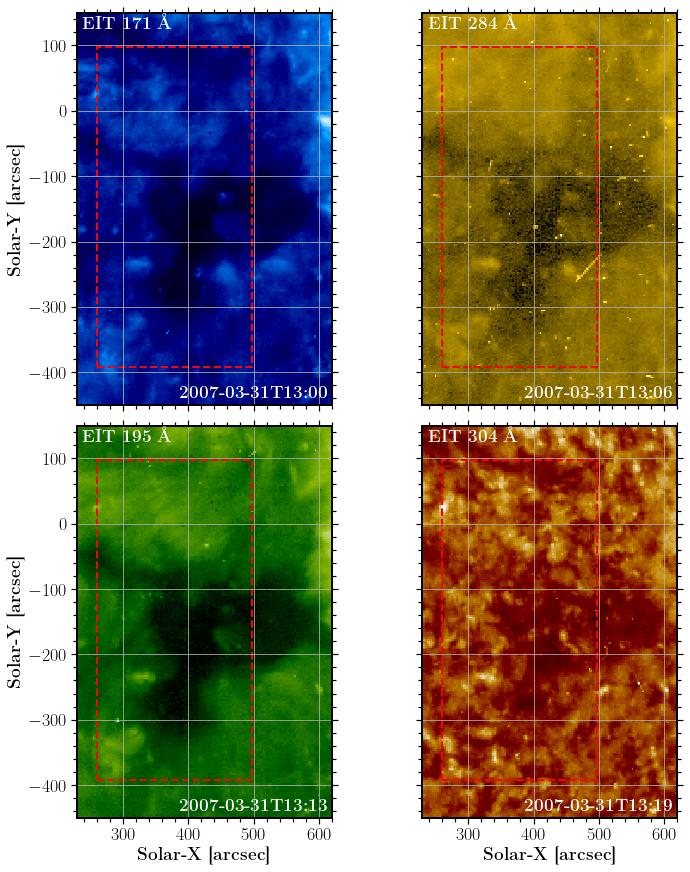

In [151]:
eit_plot_zoomin(filenames_0331,plot_EIS=True)
plt.savefig(fname="../figs/eit_summary/eit_4pass.pdf",format="pdf",transparent=False)

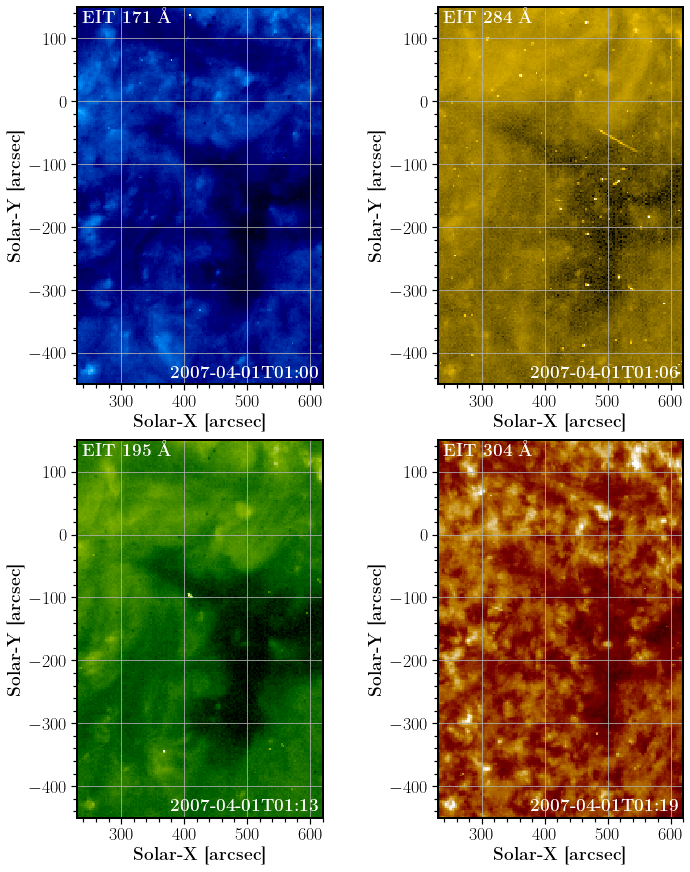

In [127]:
eit_plot_zoomin(filenames_0401)

In [128]:
with fits.open(filenames[3]) as hdul:
    print(hdul[0].header)

SIMPLE  =                    T / Written by IDL:  Thu Apr 14 12:26:41 2022      BITPIX  =                  -64 /  IEEE double precision floating point          NAXIS   =                    2 /                                                NAXIS1  =                 1024 / Number of columns                              NAXIS2  =                 1024 / Number of rows                                                                                                                 DATE    = '2007-03-31'         / Date of file creation                          TIME-OBS= '13:19:21'           /                                                DATE-OBS= '2007-03-31T13:19:21.972' / UTC at spacecraft                                                                                                         ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     DATASRC = 'LZ file           ' /                                                TELESCOP= 'SOHO'               /        